# Scalp Type Image Classifier using ResNet152v2 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob 
import tensorflow as tf
import PIL
from PIL import ImageDraw

from keras import models
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense,Flatten, Activation, BatchNormalization,Input,Add,ZeroPadding2D,AveragePooling2D,GlobalMaxPooling2D,MaxPool2D
from keras import optimizers
from keras import regularizers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet_v2 import ResNet152V2, preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions


from sklearn.metrics import confusion_matrix

Train_data, Validation, Test >> dandruff, erythema, hairloss, folliculitis, oily_scalp, dry_scalp 총 6가지 두피 타입 이미지 데이터셋이 있음

### dry_scalp 이미지 데이터 불러오기

In [ ]:
train_path = '/content/drive/MyDrive/Final_Project/Train_data/dry_scalp'
valid_path = '/content/drive/MyDrive/Final_Project/Validation/dry_scalp'
test_path = '/content/drive/MyDrive/Final_Project/Test/dry_scalp'

### oily_scalp 이미지 데이터 불러오기

In [ ]:
train_path = '/content/drive/MyDrive/Final_Project/Train_data/oily_scalp'
valid_path = '/content/drive/MyDrive/Final_Project/Validation/oily_scalp'
test_path = '/content/drive/MyDrive/Final_Project/Test/oily_scalp'

### dandruff 이미지 불러오기

In [ ]:
train_path = '/content/drive/MyDrive/Final_Project/Train_data/dandruff'
valid_path = '/content/drive/MyDrive/Final_Project/Validation/dandruff'
test_path = '/content/drive/MyDrive/Final_Project/Test/dandruff'

### erythema 이미지 불러오기

In [ ]:
train_path = '/content/drive/MyDrive/Final_Project/Train_data/erythema'
valid_path = '/content/drive/MyDrive/Final_Project/Validation/erythema'
test_path = '/content/drive/MyDrive/Final_Project/Test/erythema'

### folliculitis 이미지 불러오기


In [ ]:
train_path = '/content/drive/MyDrive/Final_Project/Train_data/folliculitis'
valid_path = '/content/drive/MyDrive/Final_Project/Validation/folliculitis'
test_path = '/content/drive/MyDrive/Final_Project/Test/folliculitis'

### hairloss 이미지 불러오기

In [ ]:
train_path = '/content/drive/MyDrive/Final_Project/Train_data/folliculitis'
valid_path = '/content/drive/MyDrive/Final_Project/Validation/folliculitis'
test_path = '/content/drive/MyDrive/Final_Project/Test/folliculitis'

------------------------------

### Image generator

In [ ]:
subject = train_path.split('/')[-1]
subject

'erythema'

In [ ]:
# image labels

labels=pd.Series(os.listdir(train_path))

labels=labels.sort_values()
labels=labels.to_list()
labels

['erythema_0', 'erythema_1', 'erythema_2', 'erythema_3']

In [ ]:
image_height = 224  # 이미지 높이
image_width = 224   # 이미지 넓이
batch_size = 64     # batch size
epochs  = 20  # trining 횟수

In [ ]:
# ImageDataGenerator 클래스를 통해 train_datagen, val_datagen 인스턴스를 생성.
# 픽셀 값을 0~1 범위로 변환

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# train_datagen 인스턴스를 통해 train dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 training_set 객체를 생성.
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


# val_datagen 인스턴스를 통해 test dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 test_set 객체를 생성.
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='categorical')

#val_datagen 인스턴스를 통해 val dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 val_set 객체를 생성.
val_set = val_datagen.flow_from_directory(valid_path,
                                           target_size=(image_width, image_height),
                                           batch_size=batch_size,
                                           shuffle=False,
                                           class_mode='categorical')

Found 40709 images belonging to 4 classes.
Found 4532 images belonging to 4 classes.
Found 8034 images belonging to 4 classes.


In [ ]:
class_path = glob.glob(train_path + '/*')
class_path

['/content/drive/MyDrive/Final_Project/Train_data/erythema/erythema_3',
 '/content/drive/MyDrive/Final_Project/Train_data/erythema/erythema_0',
 '/content/drive/MyDrive/Final_Project/Train_data/erythema/erythema_2',
 '/content/drive/MyDrive/Final_Project/Train_data/erythema/erythema_1']

In [ ]:
# 각각의 data set 이 만들어 내는 이미지의 클래스 인덱스 확인
print(f'train set의 이미지 클래스: {train_set.class_indices}')
print(f'test set의 이미지 클래스: {test_set.class_indices}')
print(f'validation set의 이미지 클래스: {val_set.class_indices}')

train set의 이미지 클래스: {'erythema_0': 0, 'erythema_1': 1, 'erythema_2': 2, 'erythema_3': 3}
test set의 이미지 클래스: {'erythema_0': 0, 'erythema_1': 1, 'erythema_2': 2, 'erythema_3': 3}
validation set의 이미지 클래스: {'erythema_0': 0, 'erythema_1': 1, 'erythema_2': 2, 'erythema_3': 3}


In [ ]:
classNum = []
fileNum = []
for path in class_path :
    fileNum.append(len(glob.glob(path + '/*')))
    classNum.append(int(path.split('_')[-1]))

label_dic = dict(zip(classNum, fileNum))
label_dic

{0: 18469, 1: 29960, 2: 22240, 3: 23212}

### 모델링

In [ ]:
conv_base = ResNet152V2(include_top=False, weights='imagenet', input_shape=(224,224,3))
conv_base.summary()

234561536/234545216 [==============================] - 11s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                    

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 71,177,348
Trainable params: 71,033,604
Non-trainable params: 143,744
_________________________________________________________________


In [ ]:
for i, layer in enumerate(conv_base.layers) :
  print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 pool1_pad
4 pool1_pool
5 conv2_block1_preact_bn
6 conv2_block1_preact_relu
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_pad
11 conv2_block1_2_conv
12 conv2_block1_2_bn
13 conv2_block1_2_relu
14 conv2_block1_0_conv
15 conv2_block1_3_conv
16 conv2_block1_out
17 conv2_block2_preact_bn
18 conv2_block2_preact_relu
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_pad
23 conv2_block2_2_conv
24 conv2_block2_2_bn
25 conv2_block2_2_relu
26 conv2_block2_3_conv
27 conv2_block2_out
28 conv2_block3_preact_bn
29 conv2_block3_preact_relu
30 conv2_block3_1_conv
31 conv2_block3_1_bn
32 conv2_block3_1_relu
33 conv2_block3_2_pad
34 conv2_block3_2_conv
35 conv2_block3_2_bn
36 conv2_block3_2_relu
37 max_pooling2d
38 conv2_block3_3_conv
39 conv2_block3_out
40 conv3_block1_preact_bn
41 conv3_block1_preact_relu
42 conv3_block1_1_conv
43 conv3_block1_1_bn
44 conv3_block1_1_relu
45 conv3_block1_2_pad
46 

In [ ]:
for layer in conv_base.layers : 
  layer.trainable = False 

In [ ]:
for layer in conv_base.layers[528:] :
  layer.trainable = True

In [ ]:
# model.summary()

In [ ]:
# optimizer 정의

opt = tf.keras.optimizers.Adam(learning_rate= 0.0001,beta_1=0.9, beta_2=0.999,epsilon=1e-07)

In [ ]:
# 모델 학습시 가장 최신의 최고 모델을 저장하는 인스턴스를 정의
modelCheckpoint = ModelCheckpoint('/content/drive/MyDrive/Final_Project/박현우/model/erythema_resnet.h5', save_best_only=True)

# 모델 학습시 정확도를 모니터링하여 조기에 학습을 종료시키는 인스턴스 정의
monitor_val_acc = EarlyStopping(monitor='val_acc', patience=7)

# callback 정의
callbacks= [modelCheckpoint,monitor_val_acc]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['acc'])

In [45]:
resnet152v2_history =model.fit_generator(train_set,
                    steps_per_epoch=2400//batch_size,
                    epochs=epochs,
                    validation_data=val_set,
                    validation_steps=800//batch_size,
                    callbacks=callbacks
                   )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
37/37 [==============================] - 1749s 47s/step - loss: 1.3955 - acc: 0.4649 - val_loss: 0.8613 - val_acc: 0.6198
Epoch 2/20
37/37 [==============================] - 855s 23s/step - loss: 0.9456 - acc: 0.5819 - val_loss: 0.7871 - val_acc: 0.6810
Epoch 3/20
37/37 [==============================] - 609s 16s/step - loss: 0.7796 - acc: 0.6782 - val_loss: 0.8540 - val_acc: 0.6302
Epoch 4/20
37/37 [==============================] - 416s 11s/step - loss: 0.6998 - acc: 0.7073 - val_loss: 0.7656 - val_acc: 0.6810
Epoch 5/20
37/37 [==============================] - 318s 9s/step - loss: 0.6212 - acc: 0.7479 - val_loss: 0.6236 - val_acc: 0.7409
Epoch 6/20
37/37 [==============================] - 228s 6s/step - loss: 0.5320 - acc: 0.7935 - val_loss: 0.6500 - val_acc: 0.7422
Epoch 7/20
37/37 [==============================] - 164s 4s/step - loss: 0.4492 - acc: 0.8305 - val_loss: 0.6859 - val_acc: 0.7057
Epoch 8/20
37/37 [==============================] - 107s 3s/step - loss: 0.397

In [48]:
# resnet_model 모델 평가
(test_loss, test_accuracy) = model.evaluate(test_set, steps=800//batch_size, verbose=1)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy*100)

12/12 [==============================] - 310s 28s/step - loss: 1.1518 - acc: 0.6517
Test loss: 1.1517677307128906
Test accuracy: 65.16854166984558


In [47]:
# font 설정

font1 = {'family': 'DejaVu Sans',
         'weight': 'bold',
         'size': 20
         }

font2 = {'family': 'DejaVu Sans',
         'size': 16
         }   

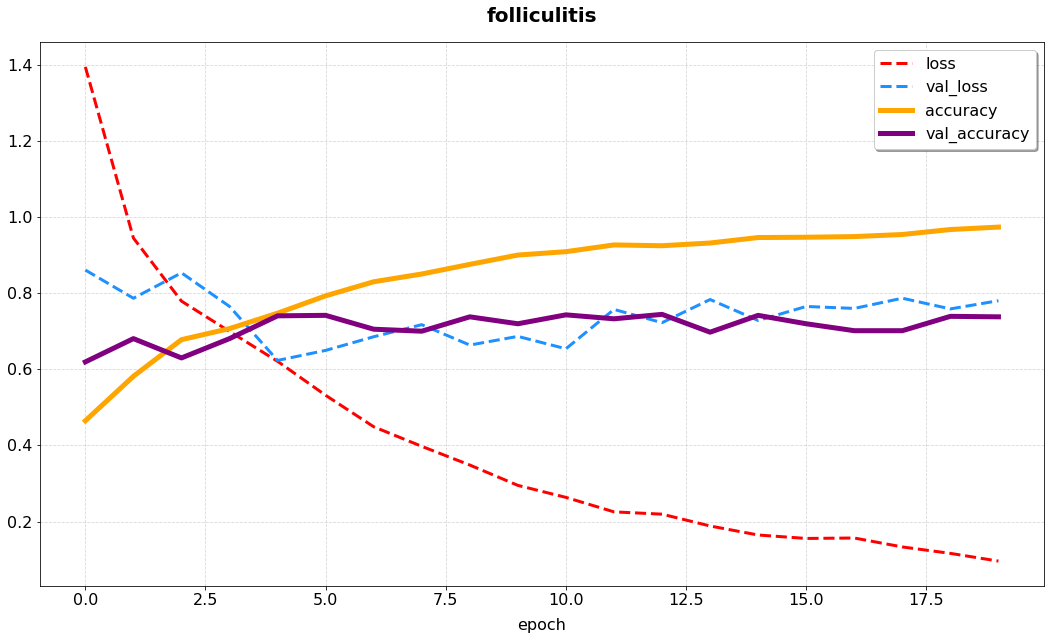

In [46]:
plt.figure(figsize=(18,10))

plt.plot(resnet152v2_history.history['loss'], '--', c = 'red', label = 'loss', linewidth = 3)
plt.plot(resnet152v2_history.history['val_loss'], '--', c = 'dodgerblue', label = 'val_loss', linewidth = 3)
plt.plot(resnet152v2_history.history['acc'], c='orange',label = 'accuracy', linewidth = 5)
plt.plot(resnet152v2_history.history['val_acc'],c='purple',label = 'val_accuracy', linewidth = 5)


plt.legend(['loss', 'val_loss','accuracy','val_accuracy'],shadow = True, loc='best',fontsize = 16)
plt.title('erythema', fontdict=font1, pad = 20)
plt.xlabel('epoch', fontdict=font2, labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_set)
classes = test_set.classes[test_set.index_array]
y_pred = np.argmax(Y_pred, axis=1)

result_dict = dict(map(reversed, test_set.class_indices.items()))
class_names = list(result_dict.values())

print('-- Confusion Matrix --')
print(confusion_matrix(classes, y_pred))

print('-- Classification Report --')
print(classification_report(classes, y_pred, target_names=class_names))

-- Confusion Matrix --
[[   0    0   68    8]
 [  35    0 2171  159]
 [  23    0 1238   99]
 [   6    0  288   28]]
-- Classification Report --
              precision    recall  f1-score   support

  dandruff_0       0.00      0.00      0.00        76
  dandruff_1       0.00      0.00      0.00      2365
  dandruff_2       0.33      0.91      0.48      1360
  dandruff_3       0.10      0.09      0.09       322

    accuracy                           0.31      4123
   macro avg       0.11      0.25      0.14      4123
weighted avg       0.12      0.31      0.17      4123



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'dandruff_confusion matrix')

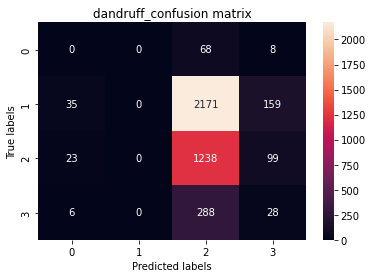

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(classes, y_pred), annot=True, fmt='d' )
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title(f'{subject}_confusion matrix')